# Effect of COVID19 on sales of in industries of US

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

The source data is divided into three different datasets. 
1.	Supermarket sales.
2.	Stock prices of USA.
3.	Personal Consumption Expenditures by Major Type of Product, Billions of Dollars.
> * Food
> * Services
> * Medic-aid
> * Durable goods
> * Non-durable goods


In [ ]:
# stock US @https://finance.yahoo.com/quote/%5EIXIC/history?period1=1485302400&period2=1598313600&interval=1d&filter=history&frequency=1d
stock = pd.read_csv("drive/My Drive/Dataset for COVID19 impact/nasdaq.csv")

# Personal consumption expenditures: @https://fred.stlouisfed.org/release/tables?rid=54&eid=3220#
## food 
pce_food=pd.read_csv('drive/My Drive/Dataset for COVID19 impact/exp-food.csv')
## services
pce_services=pd.read_csv('drive/My Drive/Dataset for COVID19 impact/exp-services.csv')
## durable goods
pce_durable=pd.read_csv('drive/My Drive/Dataset for COVID19 impact/exp-durable-goods.csv')
## nondurable goods
pce_nondurable=pd.read_csv('drive/My Drive/Dataset for COVID19 impact/exp-nondurable-goods.csv')
## medicaid
pce_medicaid=pd.read_csv('drive/My Drive/Dataset for COVID19 impact/exp_medicaid.csv')

# Super market sales: @https://www.kaggle.com/aungpyaeap/supermarket-sales
supermarket_sales=pd.read_csv('drive/My Drive/Dataset for COVID19 impact/supermarket-sales.csv')


In [ ]:
pce_services.head()

,DATE,PCES
0,2011-01-01,6985.1
1,2011-02-01,7012.9
2,2011-03-01,7051.0
3,2011-04-01,7066.3
4,2011-05-01,7105.7


## **Industry before COVID19**

---



### *Data:  supermarket sales*

## Cleaning

In [ ]:
supermarket_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
supermarket_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
supermarket_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
supermarket_sales['Date'] = pd.to_datetime(supermarket_sales['Date'])

## Visualizing product sales

Text(0, 0.5, 'Product line')

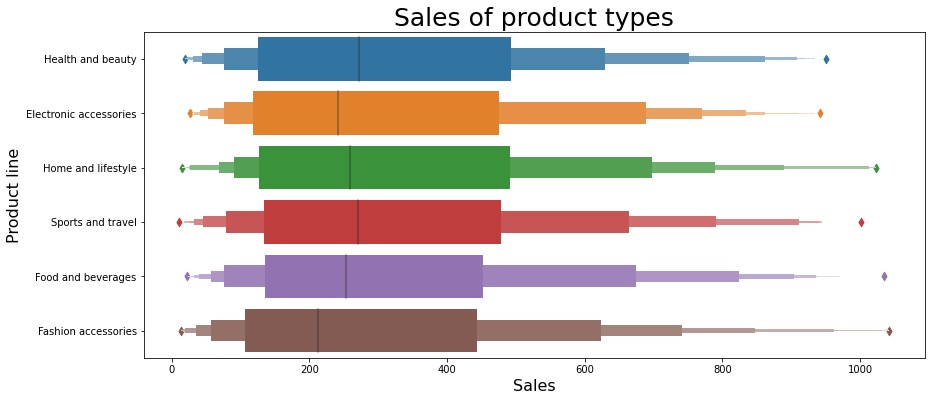

In [ ]:
## boxen plot

plt.figure(figsize = (14,6))
ax = sns.boxenplot(y = "Product line", x = "Total", data = supermarket_sales)
ax.set_title("Sales of product types", fontsize = 25)
ax.set_xlabel("Sales", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)

Here we can see that the average sales of different lines of products. Health and beauty making the highest sales whereas Fashion accessories making the lowest sales. That being said, we can observe that food and beverages is the second lowest in the chart above

In [ ]:
pivot=supermarket_sales.pivot_table( 'Total', ['Product line'],aggfunc=[np.sum])
pivot

,sum
,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


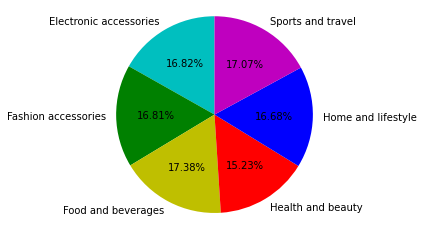

In [ ]:
flattened = pd.DataFrame(pivot.to_records())
flattened
colors = ['c', 'g', 'y','r','b','m']

plt.pie(flattened["('sum', 'Total')"], labels=flattened['Product line'], colors=colors,
        startangle=90,
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
# plt.title('Pie Chart Example')
plt.show()

In [ ]:
flattened.rename(columns = {"('sum', 'Total')":'Total sum'}, inplace = True) 
flattened

,Product line,Total sum
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


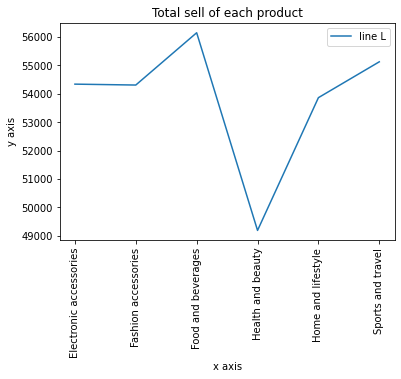

In [ ]:
plt.plot(flattened['Product line'], flattened['Total sum'], label="line L")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Total sell of each product")
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

Summing up the totals for each month

In [ ]:
x=(supermarket_sales.assign(Date=supermarket_sales.Date.dt.strftime('%m/%Y'))
    .groupby(['Product line','Date'])
    .sum()
    .reset_index()
)

In [ ]:
health_beauty=x.loc[x['Product line'].isin(['Health and beauty'])]
home=x.loc[x['Product line'].isin(['Home and lifestyle'])]
food=x.loc[x['Product line'].isin(['Food and beverages'])]
electronic=x.loc[x['Product line'].isin(['Electronic accessories'])]
food 

,Product line,Date,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
6,Food and beverages,01/2019,3237.38,325,931.930,19570.530,18638.60,266.666667,931.930,414.7
7,Food and beverages,02/2019,3367.99,349,952.398,20000.358,19047.96,295.238095,952.398,434.8
8,Food and beverages,03/2019,3140.17,278,789.236,16573.956,15784.72,266.666667,789.236,388.2


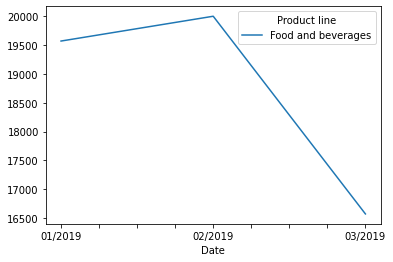

In [ ]:
food.pivot_table( 'Total', ['Date'], 'Product line').dropna().plot()

We can observe the above plot is not profecient with our evaluation since it contains data of just the first three months of 2019. This can be limiting be plotting a time series chart.

## **Market After COVID19**
---




### *Data:  NAFDAQ Stocks*

## Cleaning

In [ ]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-25,5635.859863,5658.589844,5634.330078,5656.339844,5656.339844,1959950000
1,2017-01-26,5666.279785,5669.609863,5647.649902,5655.180176,5655.180176,1827490000
2,2017-01-27,5664.879883,5667.450195,5643.899902,5660.779785,5660.779785,1663400000
3,2017-01-30,5635.859863,5636.089844,5578.759766,5613.709961,5613.709961,1777090000
4,2017-01-31,5592.870117,5615.149902,5576.089844,5614.790039,5614.790039,2041480000


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       902 non-null    object 
 1   Open       902 non-null    float64
 2   High       902 non-null    float64
 3   Low        902 non-null    float64
 4   Close      902 non-null    float64
 5   Adj Close  902 non-null    float64
 6   Volume     902 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 49.5+ KB


In [ ]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,902.000000,902.000000,902.000000,902.000000,902.000000,9.020000e+02
mean,7615.608775,7662.853394,7564.854198,7618.256937,7618.256937,2.403718e+09
std,1176.609690,1189.248748,1163.821319,1179.035061,1179.035061,8.643129e+08
min,5592.870117,5615.149902,5576.089844,5613.709961,5613.709961,1.494100e+08
25%,6813.964966,6869.264892,6755.797363,6798.177490,6798.177490,1.902792e+09
50%,7541.954834,7586.040039,7482.199951,7532.269775,7532.269775,2.128045e+09
75%,8123.179809,8155.979858,8072.192383,8117.459961,8117.459961,2.459798e+09
max,11449.250000,11462.049805,11297.530273,11379.719727,11379.719727,7.279230e+09


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])

## Visualizing Mean Stack Price over the year

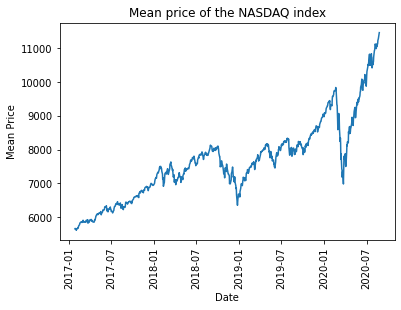

In [ ]:
mean_df = stock.groupby(['Date']).mean()
plt.title('Mean price of the NASDAQ index')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(mean_df.index,mean_df['High'])

Observe that there has been an abrupt downfall in the stocks after January 2020. Let’s drill it down further to see exactly when that happened.

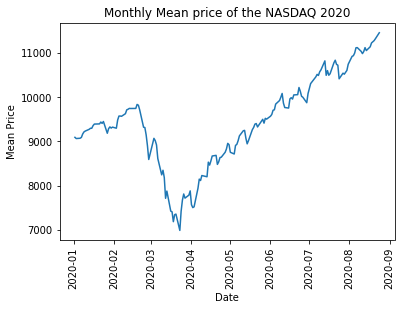

In [ ]:
mean_df = mean_df.loc[mean_df.index > '2020-01-01'].copy()
plt.title('Monthly Mean price of the NASDAQ 2020')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(mean_df.index,mean_df['High'])

Now we can see that the stocks went down in the midst of February 2020 only after Quarter past March it was able to recover itself. We already know that the first case that hit US was at January 13, 2020. 
As can be seen that the mean price of the companies listed in the NASDAQ plummet at around February 2020. It went from around 9700 to 7000 within a month, approximately 28% decrease. This could be a coincidence but there is a really high chance that it is in fact influenced by the pandemic. However, the question arises why it happened so late. We expected it should happen around January since the first case appeared at that time. The initial guess could be that people there were still careless about it.


### Which industry got impacted the most?

## Data Cleaning and Preparation

In [ ]:
pce_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             114 non-null    object 
 1   DFXARC1M027SBEA  114 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
pce_durable

,DATE,PCEDG
0,2011-01-01,1085.0
1,2011-02-01,1083.8
2,2011-03-01,1095.0
3,2011-04-01,1090.9
4,2011-05-01,1081.2
...,...,...
109,2020-02-01,1552.5
110,2020-03-01,1369.0
111,2020-04-01,1198.6
112,2020-05-01,1544.6


In [ ]:
pce_nondurable

,DATE,PCEND
0,2011-01-01,2365.4
1,2011-02-01,2373.5
2,2011-03-01,2404.4
3,2011-04-01,2430.4
4,2011-05-01,2425.1
...,...,...
109,2020-02-01,3015.7
110,2020-03-01,3129.7
111,2020-04-01,2690.0
112,2020-05-01,2893.2


In [ ]:
pce_food

,DATE,DFXARC1M027SBEA
0,2011-01-01,803.3
1,2011-02-01,807.9
2,2011-03-01,809.3
3,2011-04-01,818.6
4,2011-05-01,813.5
...,...,...
109,2020-02-01,1033.3
110,2020-03-01,1272.7
111,2020-04-01,1115.6
112,2020-05-01,1146.8


In [ ]:
pce_services

,DATE,PCES
0,2011-01-01,6985.1
1,2011-02-01,7012.9
2,2011-03-01,7051.0
3,2011-04-01,7066.3
4,2011-05-01,7105.7
...,...,...
109,2020-02-01,10309.2
110,2020-03-01,9379.8
111,2020-04-01,8200.2
112,2020-05-01,8675.7


In [ ]:
pce_medicaid

,DATE,W729RC1
0,2016-01-01,547.6
1,2016-02-01,550.5
2,2016-03-01,553.2
3,2016-04-01,555.6
4,2016-05-01,559.2
5,2016-06-01,561.5
6,2016-07-01,563.5
7,2016-08-01,566.2
8,2016-09-01,569.6
9,2016-10-01,574.0


In [ ]:
pce_medicaid.isnull().sum()

DATE       0
W729RC1    0
dtype: int64

*Data:  personal consumption expenditures for durable goods*

In [ ]:
pce_durable['DATE'] = pd.to_datetime(pce_durable['DATE'])
pce_durable.rename(columns = {'PCEDG':'Expenditure', 'DATE':'Date'}, inplace = True) 
new_durable = pce_durable.loc[pce_durable.Date > '2019-01-01'].copy().reset_index(drop=True)
new_durable['Category']='Durable goods'

*Data:  personal consumption expenditures for nondurable goods*

In [ ]:
pce_nondurable['DATE'] = pd.to_datetime(pce_nondurable['DATE'])
pce_nondurable.rename(columns = {'DATE':'Date','PCEND':'Expenditure'}, inplace = True) 
new_nondurable = pce_nondurable.loc[pce_nondurable.Date > '2019-01-01'].copy().reset_index(drop=True)
new_nondurable['Category']='Non Durable goods'

*Data:  personal consumption expenditures for food*

In [ ]:
pce_food['DATE'] = pd.to_datetime(pce_food['DATE'])
pce_food.rename(columns = {'DATE':'Date','DFXARC1M027SBEA':'Expenditure'}, inplace = True) 
new_food = pce_food.loc[pce_food.Date > '2019-01-01'].copy().reset_index(drop=True)
new_food['Category']='Food'

*Data:  personal consumption expenditures for services*

In [ ]:
pce_services['DATE'] = pd.to_datetime(pce_services['DATE'])
pce_services.rename(columns = {'DATE':'Date','PCES':'Expenditure'}, inplace = True) 
new_services = pce_services.loc[pce_services.Date > '2019-01-01'].copy().reset_index(drop=True)
new_services['Category']='Services'

*Data:  personal consumption expenditures for medical*

In [ ]:
pce_medicaid['DATE'] = pd.to_datetime(pce_medicaid['DATE'])
pce_medicaid.rename(columns = {'DATE':'Date','W729RC1':'Expenditure'}, inplace = True) 
new_medicaid = pce_medicaid.loc[pce_medicaid.Date > '2019-01-01'].copy().reset_index(drop=True)
new_medicaid['Category']='Medical'

In [ ]:
#merging datasets
new_medicaid.head()
new_data = pd.concat([new_durable, new_food, new_nondurable, new_medicaid, new_services], axis=0)
new_data.reset_index(drop=True)

,Date,Expenditure,Category
0,2019-02-01,1476.9,Durable goods
1,2019-03-01,1517.2,Durable goods
2,2019-04-01,1520.5,Durable goods
3,2019-05-01,1539.6,Durable goods
4,2019-06-01,1547.8,Durable goods
...,...,...,...
80,2020-02-01,10309.2,Services
81,2020-03-01,9379.8,Services
82,2020-04-01,8200.2,Services
83,2020-05-01,8675.7,Services


In [ ]:
new_data.pivot_table( 'Expenditure', ['Category'], 'Date')

Date,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01
Category,,,,,,,,,,,,,,,,,
Durable goods,1476.9,1517.2,1520.5,1539.6,1547.8,1546.7,1550.8,1561.0,1552.2,1555.8,1554.3,1567.9,1552.5,1369.0,1198.6,1544.6,1679.5
Food,1000.3,1015.9,1019.7,1022.1,1028.3,1037.3,1037.8,1030.4,1032.1,1032.6,1032.6,1032.7,1033.3,1272.7,1115.6,1146.8,1141.2
Medical,599.0,604.5,610.3,615.2,619.5,621.8,622.7,622.2,619.8,618.7,619.6,615.8,620.8,635.7,660.9,677.6,686.1
Non Durable goods,2904.3,2946.8,2975.4,2981.4,2988.3,3006.9,3008.1,2987.4,3010.3,3004.1,3010.3,3024.0,3015.7,3129.7,2690.0,2893.2,3044.0
Services,9855.0,9906.0,9947.2,9972.0,10019.7,10058.3,10091.9,10124.8,10165.9,10192.8,10231.7,10288.6,10309.2,9379.8,8200.2,8675.7,9127.6


## Visulizing Trend after COVID

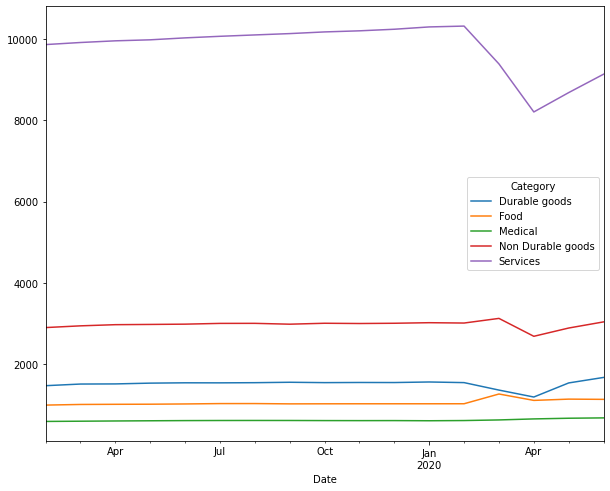

In [ ]:
new_data.pivot_table( 'Expenditure', ['Date'], 'Category').plot(figsize=(10,8))

Here we can observe a very interesting trend. We can see almost all the market entity went down around February, which was expected, except two. That is food and medical. With medical staying almost the same throughout. But why?

### health industry

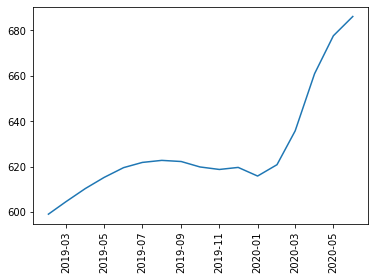

In [ ]:
plt.xticks(rotation = 'vertical')
plt.plot(new_medicaid.Date,new_medicaid['Expenditure'])

Here we can see that this industry in-fact did rose a great deal upon close inspection. Right after January, the demand for medical attention and that of the industry has risen abruptly as-well. Which in-fact is to be expected as-well. That is around 10% rise since January.

### Food Industry

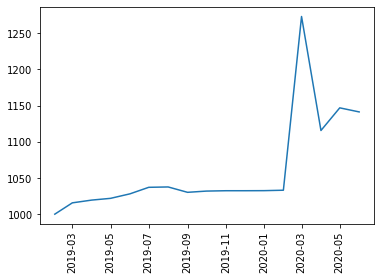

In [ ]:
plt.xticks(rotation = 'vertical')
plt.plot(new_food.Date,new_food['Expenditure'])

See how industry rose for about half a month and abruptly fell down just as quickly. This could be justified with the panic that rose among the public at the start of the outbreak. upon the government issuance of the lockdown, public starting stocking up food and groceries which led to the demand of the industry. However, the impact was short and abrupt hence the fall in graph again. 
However, we could still observe that industry is still facing ups and downs hence we could claim that an amount of population might still be stocking up.


### Service Industry

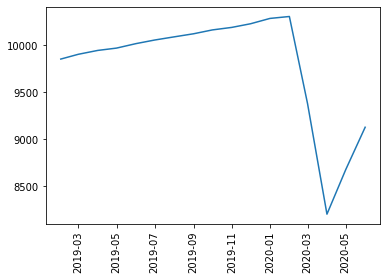

In [ ]:
plt.xticks(rotation = 'vertical')
plt.plot(new_services.Date,new_services['Expenditure'])

### Industry of Durable goods

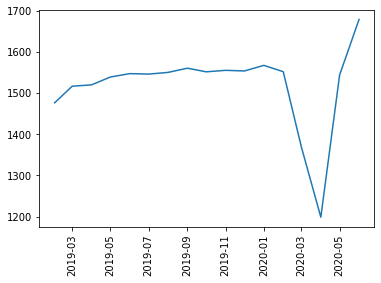

In [ ]:
plt.xticks(rotation = 'vertical')
plt.plot(new_durable.Date,new_durable['Expenditure'])

### Industry of nondurable goods

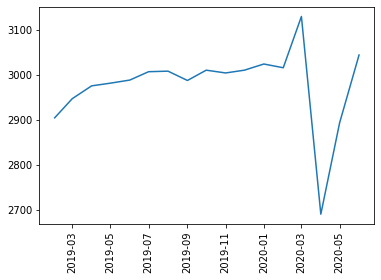

In [ ]:
plt.xticks(rotation = 'vertical')
plt.plot(new_nondurable.Date,new_nondurable['Expenditure'])

# Interpretation

Now we already know PCE was at $13 trillion in the second quarter of 2020, according to the Bureau of Economic Analysis (BEA). That's down 34.6% from the first quarter of 2020, which was already down 6.9% from 2019.
Spending on durable goods, like automobiles, fell 13.8%. Spending on services, like hair salons, fell 9.8%. Spending on food, like groceries, rose 8.0%.
U.S. retail sales in the second quarter fell 8.1% from the same quarter in 2019, according to Census Bureau data.5 The annualized rate well below the 3% annual retail sales growth rate viewed as desirable. Stores shut down and consumers stayed home to avoid the pandemic. This contributed to a 24.9% increase in online sales, as shoppers felt safer having their goods delivered.
This accentuated a long-term trend. Online sales for Black Friday in 2019 grew by 19.6% over the previous year, according to Adobe data.6 Brick-and-mortar store sales increased by only 1.6% from 2018, says RetailNext.
